In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [4]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(7).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.236, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-7 in yolov8:: 100%|██████████| 7460/7460 [00:01<00:00, 5947.10it/s]


# **LOAD THE MODEL**

In [2]:
yolo8_model_detection =YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 222MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [7]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-7 datasets/sixray100-1

# **TRAIN MODEL**

In [8]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=100, imgsz=640, batch=32,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=100, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]
2024-01-07 08:12:36,592	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-07 08:12:37,726	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/train/labels... 2841 images, 4 backgrounds, 0 corrupt: 100%|██████████| 2841/2841 [00:02<00:00, 1087.00it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/weapon_detection-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 7064. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<00:00, 1049.33it/s]

val: New cache created: /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        14G      1.245      2.078       1.43        106        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

                   all        587       1503      0.594      0.313      0.343      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.2G      1.246      1.419      1.455        142        640: 100%|██████████| 89/89 [01:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.765        0.3      0.322      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.3G      1.229      1.299      1.454        111        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


                   all        587       1503      0.712      0.204      0.229      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        14G      1.233      1.292      1.461        119        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.759      0.368       0.41      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.3G      1.202      1.237      1.438         93        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


                   all        587       1503      0.789      0.387      0.431      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        14G      1.158      1.163      1.404        112        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.628      0.485      0.485      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.3G      1.134      1.097      1.383        141        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.853      0.493       0.54      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.9G      1.093      1.042      1.349        102        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503        0.7      0.532       0.56      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.3G      1.079      1.008      1.338        126        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.866      0.481      0.574      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.9G       1.05     0.9648       1.32        140        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.775       0.51      0.599      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.3G      1.041     0.9377      1.309        112        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.883       0.55      0.635      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.9G      1.011     0.8887      1.288        103        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.625      0.561      0.607      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.2G      1.012     0.8839      1.285        111        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503       0.87      0.527       0.69      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.9G     0.9828       0.86      1.262        141        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.806       0.61      0.644      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.3G     0.9837     0.8481      1.268         91        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503        0.8       0.61      0.635      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.9G     0.9636     0.8103      1.254        130        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.834      0.641      0.703      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.3G     0.9478     0.8038      1.249        127        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.832      0.623      0.661       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        14G     0.9476     0.8004      1.235        111        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.849      0.627      0.678      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.8G     0.9318      0.777      1.231        109        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        587       1503        0.9      0.614      0.685      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        14G     0.9221     0.7587      1.217        141        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        587       1503      0.693       0.64      0.685      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.3G      0.917     0.7521      1.218        126        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.836      0.653      0.686      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        14G     0.9149     0.7455      1.217        102        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.892      0.634      0.681      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.3G     0.9043     0.7265      1.206        122        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.823      0.652       0.69      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.6G     0.8973     0.7163      1.202        116        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.889      0.654      0.727      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.3G     0.8866     0.7122      1.195        114        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.891      0.735      0.782      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.6G     0.8673     0.6849      1.185        101        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.857      0.677      0.703      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.3G     0.8537     0.6733      1.169        122        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.796      0.756      0.759      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.9G      0.855     0.6713      1.174        135        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.907      0.733      0.799       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.3G      0.867     0.6706      1.183        127        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]

                   all        587       1503      0.904      0.666      0.739      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.9G     0.8404     0.6613      1.165        127        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.871      0.738      0.798      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.3G     0.8423     0.6422      1.157        103        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.881       0.76      0.808      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.9G     0.8409     0.6366      1.156        104        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.925       0.66      0.745      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.3G     0.8249     0.6231       1.15        109        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.912      0.691      0.825      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.9G     0.8182     0.6095      1.141        146        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.927      0.748      0.829      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.3G     0.8189      0.612      1.151        138        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.892      0.676      0.751       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        14G     0.8173      0.621       1.15        113        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.741      0.834      0.821       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.3G     0.8178     0.6117      1.141         84        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.698      0.814      0.779       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.6G     0.8076     0.5971      1.141        131        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.906      0.763       0.82      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.2G     0.8004     0.5836      1.135        109        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.896      0.694      0.753      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.6G     0.7993     0.5929      1.138         99        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503       0.89      0.848      0.892      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.8G      0.791     0.5797      1.132        112        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.895      0.848      0.907      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        14G     0.7793     0.5711      1.123        139        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503       0.84      0.788      0.791      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.3G      0.768     0.5517      1.115        121        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.869      0.768      0.821      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      13.9G     0.7766     0.5623      1.116        118        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.779      0.808      0.812      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.8G     0.7608       0.55       1.11        125        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.919      0.681      0.771      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.5G     0.7649     0.5507      1.113        126        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.899      0.856      0.906      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.3G     0.7641     0.5579      1.116        134        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503       0.89      0.887       0.91      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        14G     0.7531     0.5475      1.103        123        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.866      0.791      0.822      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.3G     0.7416     0.5339        1.1         96        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.895      0.784      0.816      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.5G      0.749     0.5366      1.103        118        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503       0.78       0.81      0.779      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.3G     0.7268     0.5129      1.088         96        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503       0.89      0.786      0.866        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.9G     0.7401     0.5251      1.098        136        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.879      0.876      0.894      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      14.3G     0.7259     0.5056      1.086        124        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.784      0.913      0.875      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.1G     0.7238     0.5028      1.087        110        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503       0.67      0.877      0.853      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.2G     0.7305     0.5125      1.092        118        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.907      0.727      0.775      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.9G     0.7222     0.4993      1.084         96        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.885      0.859      0.896      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.3G     0.7095     0.5011      1.079         85        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.807      0.916      0.904      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.9G      0.719     0.4991      1.086        135        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503       0.87      0.888      0.905      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.3G     0.7074     0.4966      1.075         93        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503       0.89      0.891      0.903       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        14G     0.7055     0.4842      1.074        128        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.904      0.762      0.881      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      14.3G     0.6988     0.4812       1.07        103        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.827      0.893      0.905      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        14G     0.6948     0.4816      1.067        103        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.902        0.9      0.904      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      14.2G      0.698     0.4854      1.069        116        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.904       0.88      0.907      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        14G     0.6934     0.4737      1.067        127        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.912      0.879      0.906      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      14.3G     0.6785     0.4713      1.054        128        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.899        0.9      0.912      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.9G     0.6821     0.4727      1.058        111        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        587       1503      0.857      0.899      0.878      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.3G     0.6785     0.4659      1.059        121        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.902      0.899      0.906      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        14G     0.6717      0.462      1.058        123        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.875        0.9      0.903      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.3G     0.6699     0.4595      1.051        114        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.743      0.724      0.791      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      13.9G     0.6665      0.456      1.055        118        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.934      0.851      0.913       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.3G     0.6546      0.446      1.047        127        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.892      0.893      0.919      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      13.9G     0.6596     0.4485      1.045        147        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.807       0.84      0.846       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      14.2G      0.654     0.4396      1.048        130        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.883      0.907      0.914      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        14G     0.6518     0.4446      1.047        107        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.849      0.908      0.886      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      14.3G     0.6459     0.4352      1.042        100        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]

                   all        587       1503       0.81      0.917      0.885      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.9G     0.6329     0.4302      1.034        123        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.891      0.897      0.919      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.2G     0.6372     0.4254      1.035        123        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.912      0.873       0.91      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        14G     0.6331     0.4265      1.037        136        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        587       1503      0.903      0.902      0.916      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.7G     0.6358     0.4349      1.036        113        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.901      0.896      0.921      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      13.4G     0.6184     0.4192      1.028        113        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.823      0.906      0.886      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.2G      0.619     0.4211      1.028        135        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.888      0.907       0.92      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      13.6G     0.6168      0.413      1.023        119        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.907      0.905      0.922      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.3G     0.6176     0.4101       1.02        134        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.912      0.894      0.913      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.9G     0.6107     0.4069      1.019        109        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        587       1503      0.905      0.902      0.911      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.3G     0.6106     0.4085      1.023         95        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.918      0.902      0.915      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.9G     0.6003     0.4035      1.017        112        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.888      0.909      0.915      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      14.3G     0.5953      0.399      1.015        111        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503       0.92      0.904      0.913      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.7G     0.5912     0.3989      1.013        106        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.919      0.885      0.914      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      14.3G     0.5923     0.3947      1.013        114        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]

                   all        587       1503      0.924      0.909      0.918      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        14G     0.5874     0.3958      1.008         98        640: 100%|██████████| 89/89 [01:21<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        587       1503      0.928      0.905      0.918      0.768


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      14.2G     0.4963     0.2791     0.9594         59        640: 100%|██████████| 89/89 [01:23<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.921      0.887      0.918      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      13.9G     0.4925     0.2755     0.9624         55        640: 100%|██████████| 89/89 [01:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.937      0.871      0.914      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.2G     0.4818     0.2693     0.9528         53        640: 100%|██████████| 89/89 [01:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.934      0.893       0.92      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.9G     0.4799     0.2716     0.9567         68        640: 100%|██████████| 89/89 [01:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.918      0.903      0.919      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.7G     0.4737     0.2663     0.9568         52        640: 100%|██████████| 89/89 [01:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.928      0.902      0.919      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      13.9G     0.4739     0.2663     0.9524         53        640: 100%|██████████| 89/89 [01:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.935      0.901      0.923      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      14.2G     0.4682     0.2621      0.945         67        640: 100%|██████████| 89/89 [01:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        587       1503      0.935      0.902      0.921      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      13.9G     0.4702     0.2653     0.9509         65        640: 100%|██████████| 89/89 [01:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.938       0.88      0.918      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      14.2G     0.4587     0.2571      0.941         65        640: 100%|██████████| 89/89 [01:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        587       1503      0.939      0.881      0.917      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      13.9G     0.4554     0.2553     0.9351         60        640: 100%|██████████| 89/89 [01:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        587       1503      0.934      0.885      0.919      0.768



100 epochs completed in 2.516 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 52.0MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 52.0MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


                   all        587       1503      0.923      0.909      0.916      0.783
                   Gun        587        739      0.977      0.984      0.992      0.858
                Hammer        587          2          1      0.992      0.995      0.995
                 Knife        587        429      0.953      0.904      0.952      0.744
                Pliers        587        118      0.952      0.958      0.976      0.818
              Scissors        587         24      0.743       0.75      0.658      0.492
                Wrench        587        191      0.915      0.864      0.926      0.791
Speed: 0.7ms preprocess, 8.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f99fc15caf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# **VAIDATE MODEL**

In [9]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:15<00:00,  1.24it/s]


                   all        587       1503      0.924      0.907      0.918      0.772
                   Gun        587        739      0.981      0.983      0.992      0.859
                Hammer        587          2      0.986          1      0.995      0.921
                 Knife        587        429      0.953      0.902      0.952      0.744
                Pliers        587        118      0.956      0.958      0.977      0.819
              Scissors        587         24      0.748      0.742      0.668      0.499
                Wrench        587        191      0.921      0.855      0.926       0.79
Speed: 0.8ms preprocess, 19.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


array([    0.85945,       0.921,     0.74439,       0.819,     0.49859,     0.79006])

# **TESTING MODEL**


image 1/296 /kaggle/working/weapon_detection-7/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 36.0ms
image 2/296 /kaggle/working/weapon_detection-7/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 35.2ms
image 3/296 /kaggle/working/weapon_detection-7/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 27.7ms
image 4/296 /kaggle/working/weapon_detection-7/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 2 Scissorss, 27.0ms
image 5/296 /kaggle/working/weapon_detection-7/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 24.4ms
image 6/296 /kaggle/working/weapon_detection-7/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 24.4ms
image 7/296 /kaggle/working/weapon_detection-7/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 24.3ms
image 8/296 /kaggle/

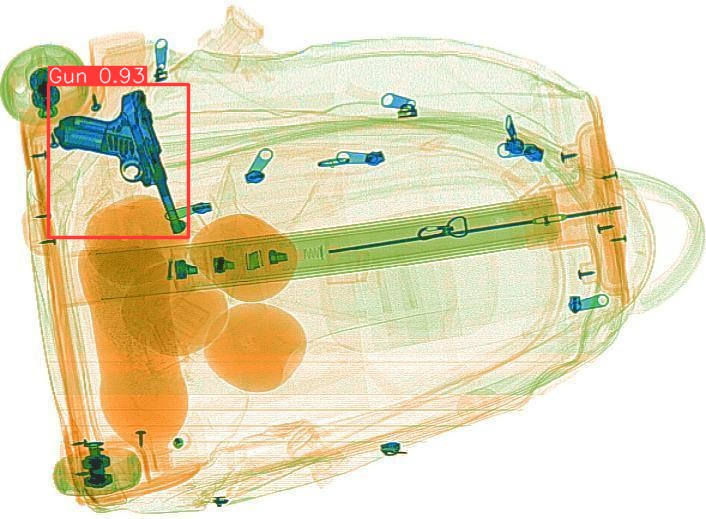

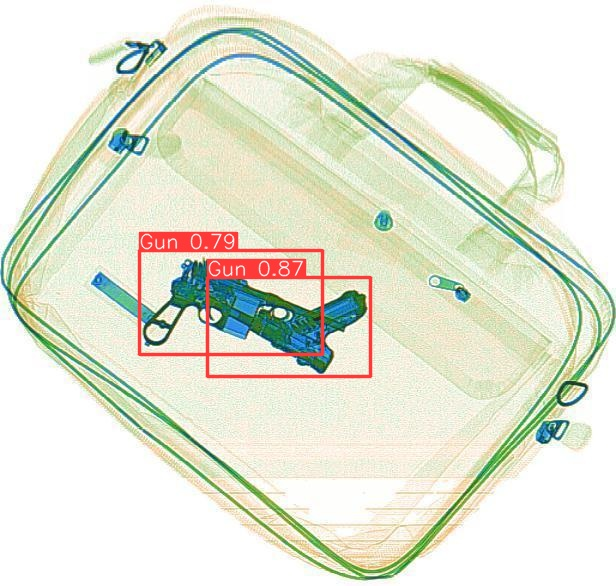

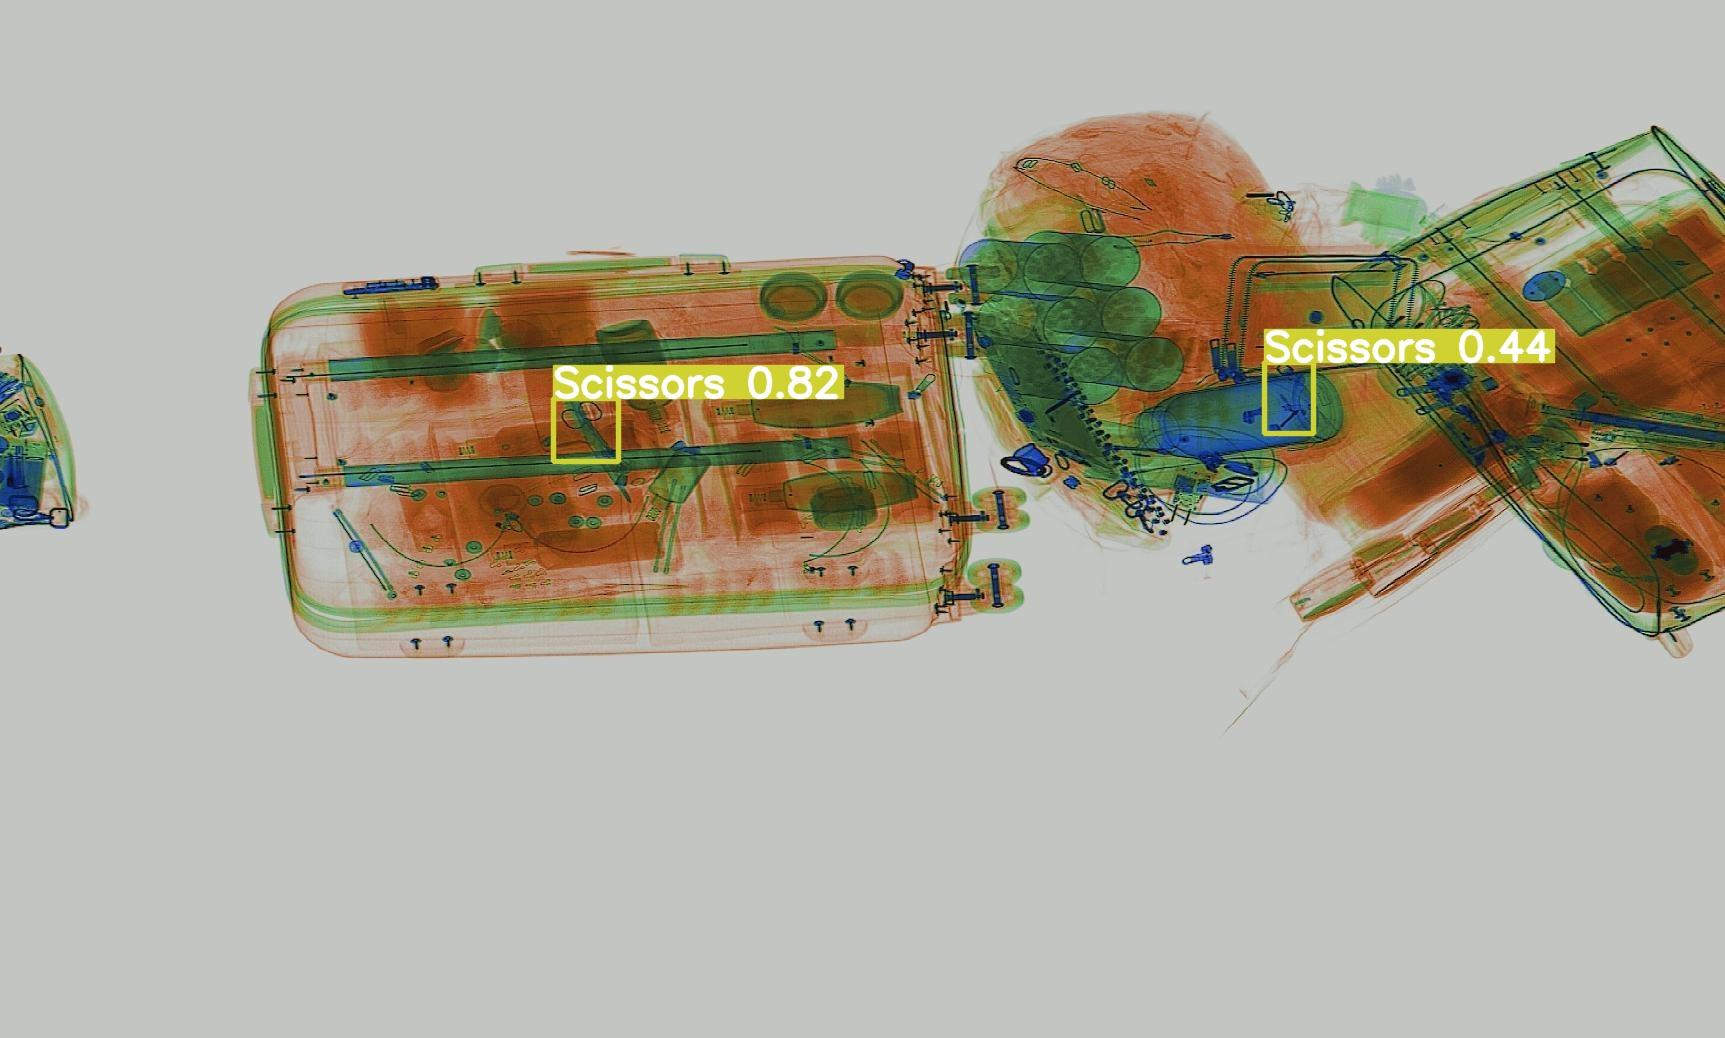

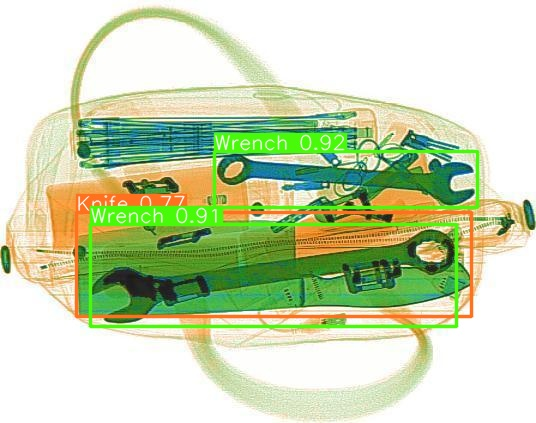

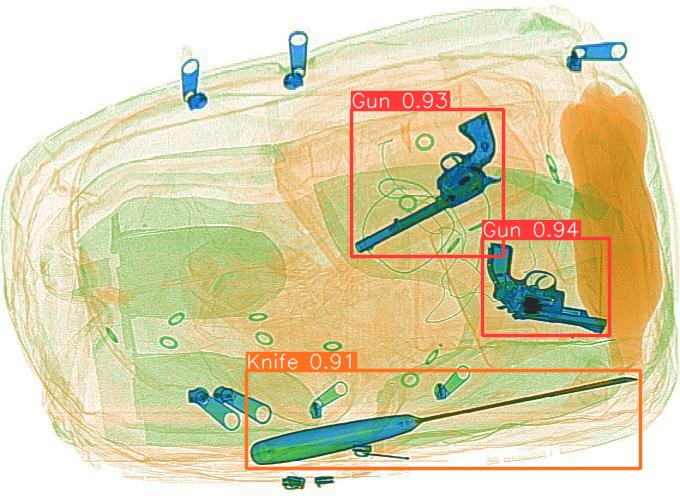

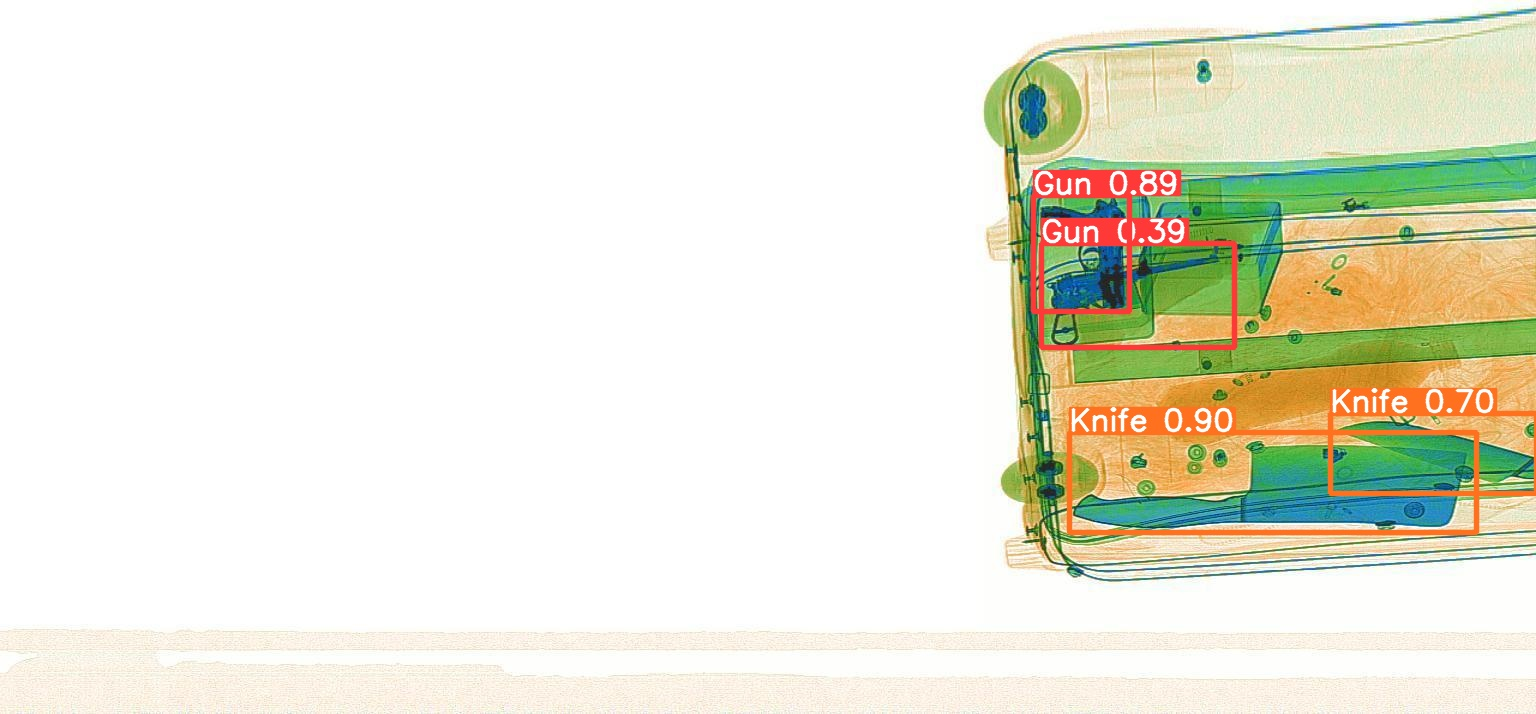

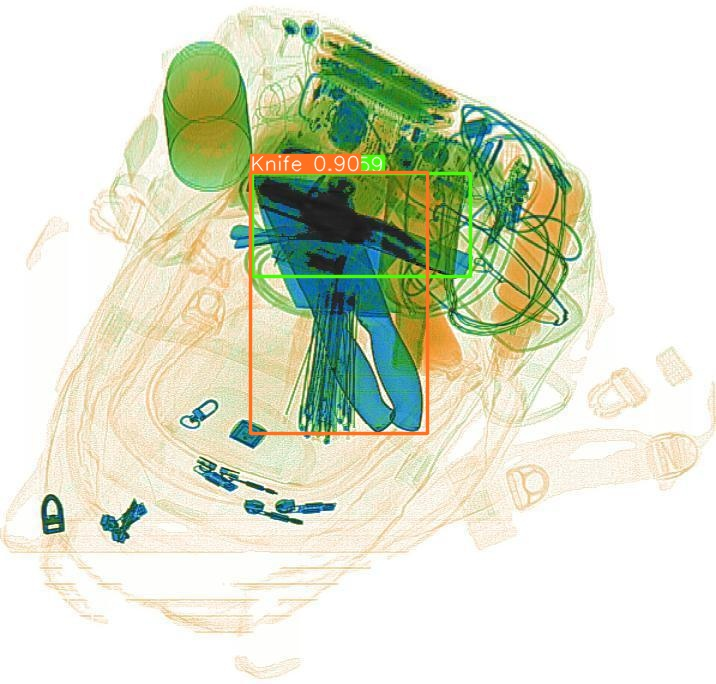

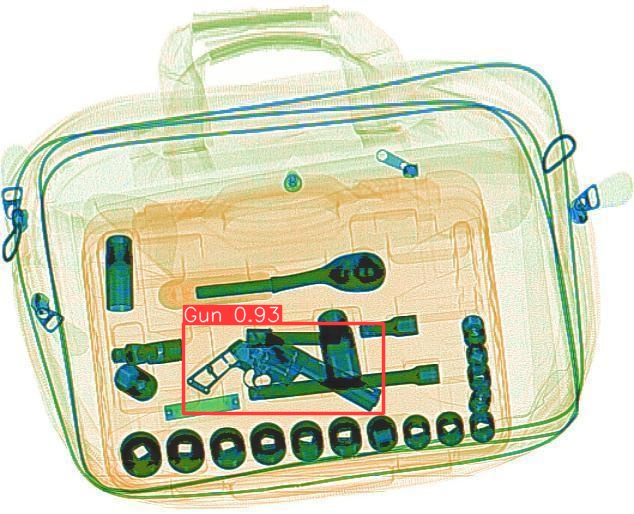

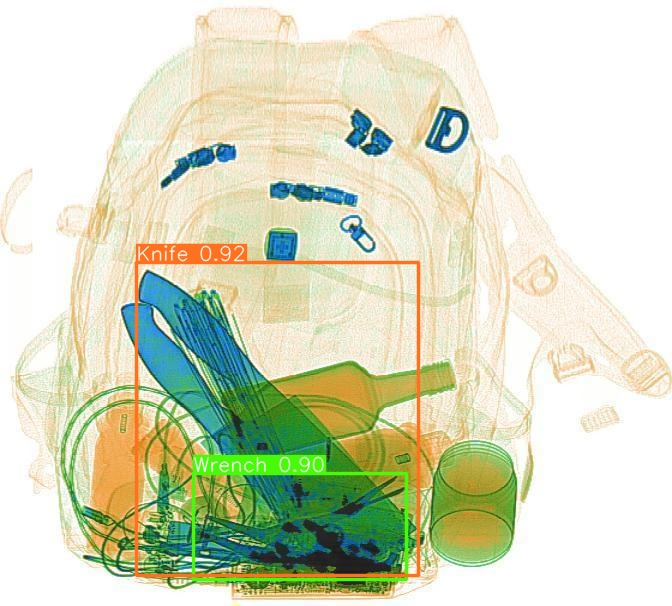

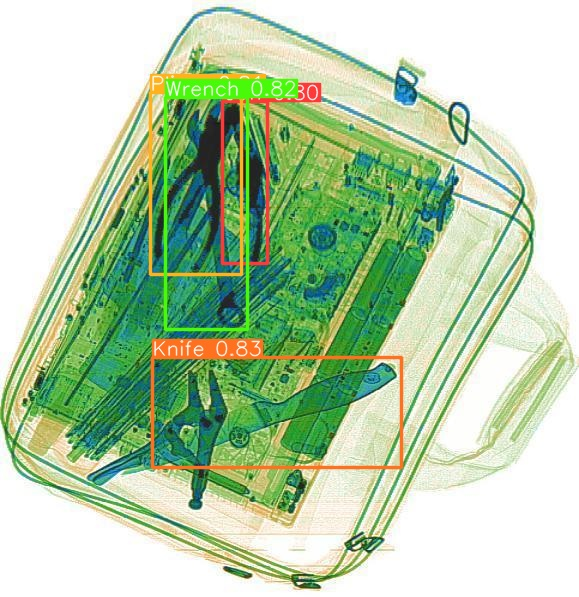

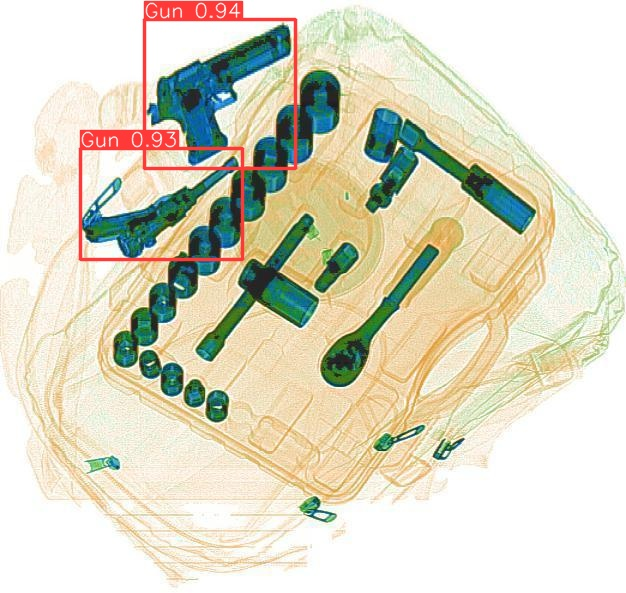

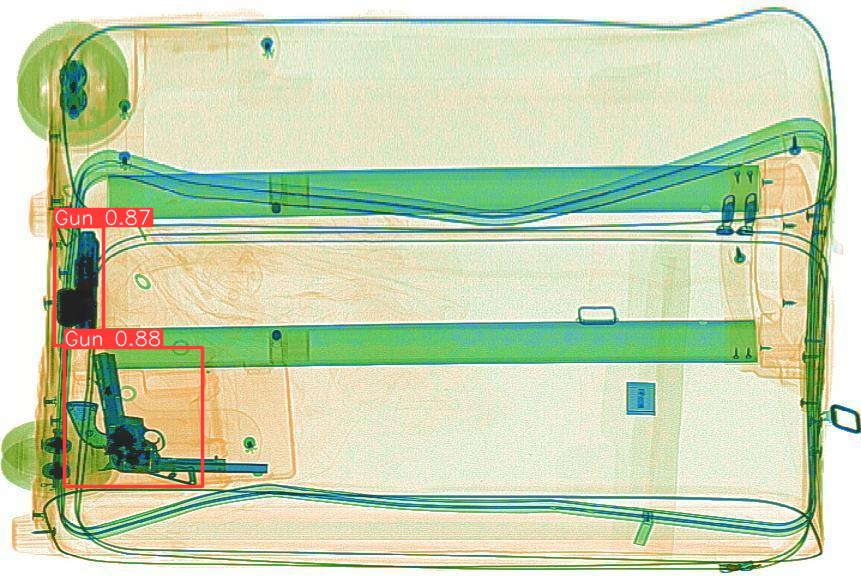

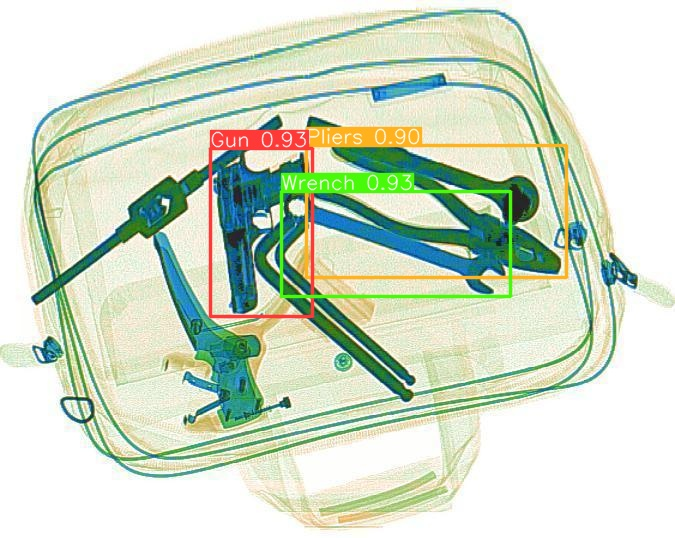

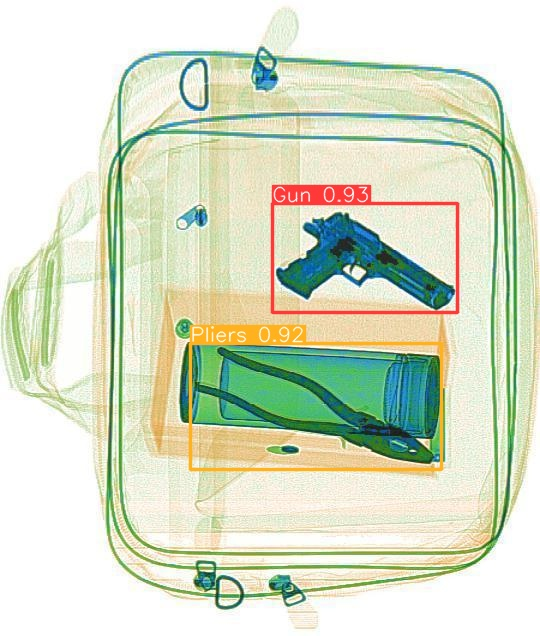

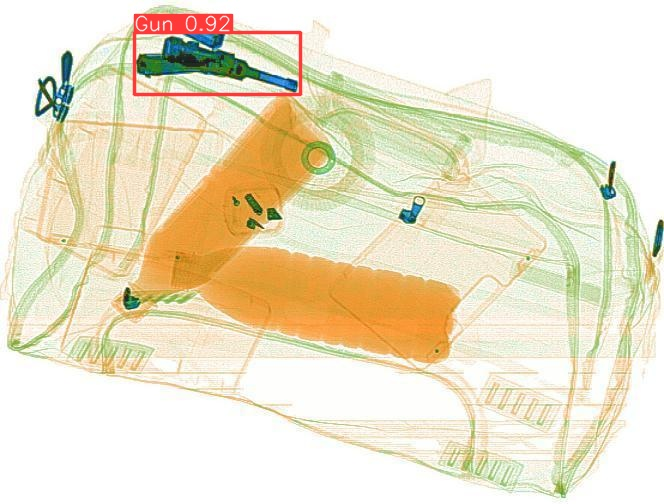

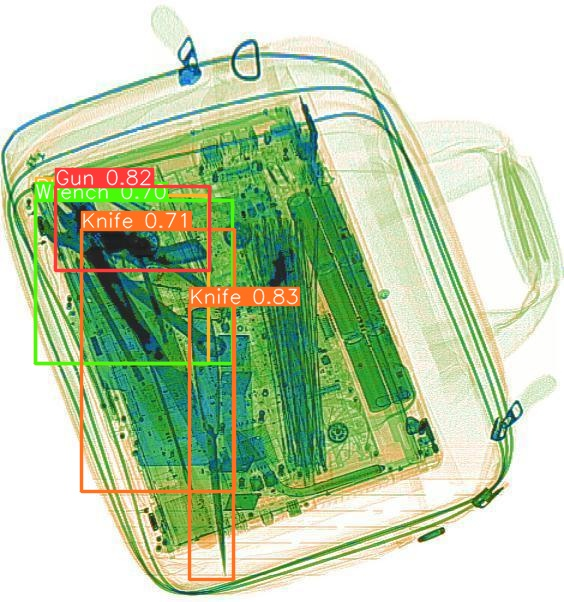

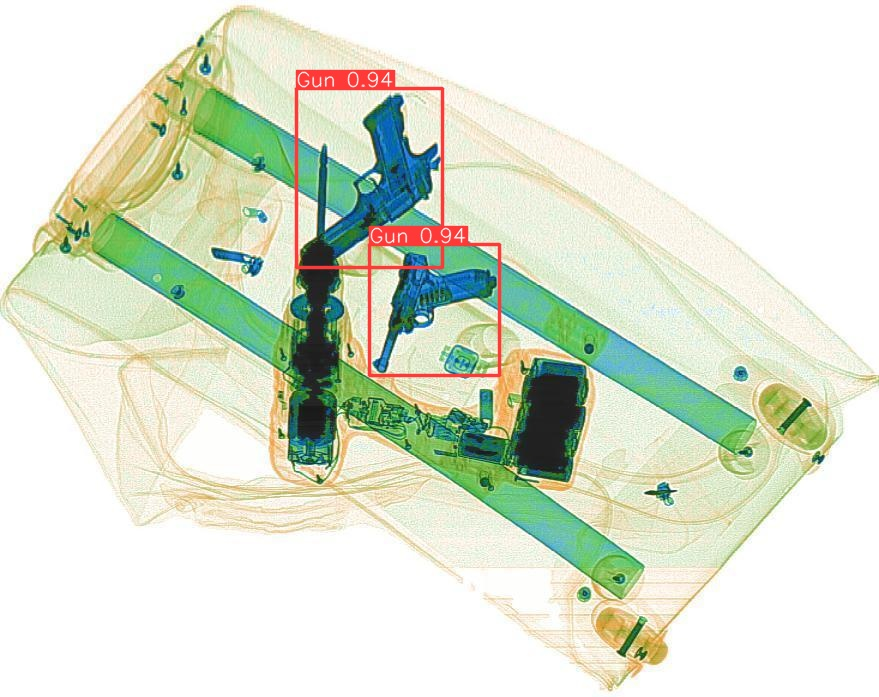

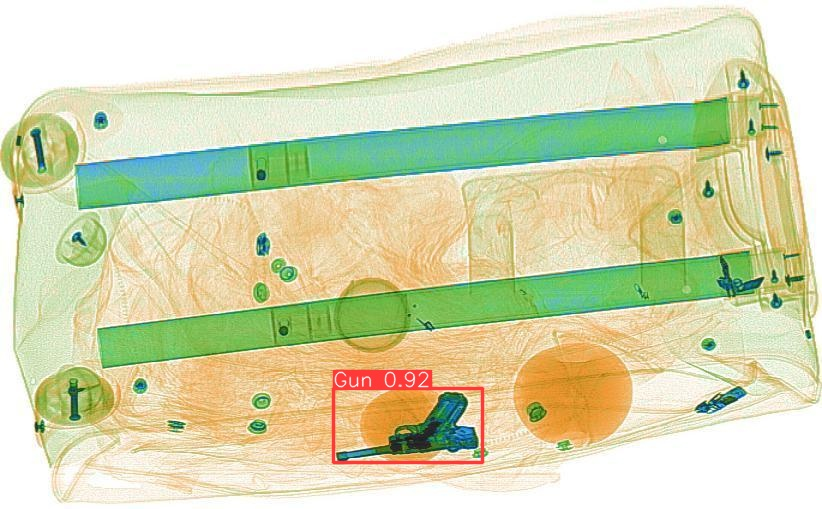

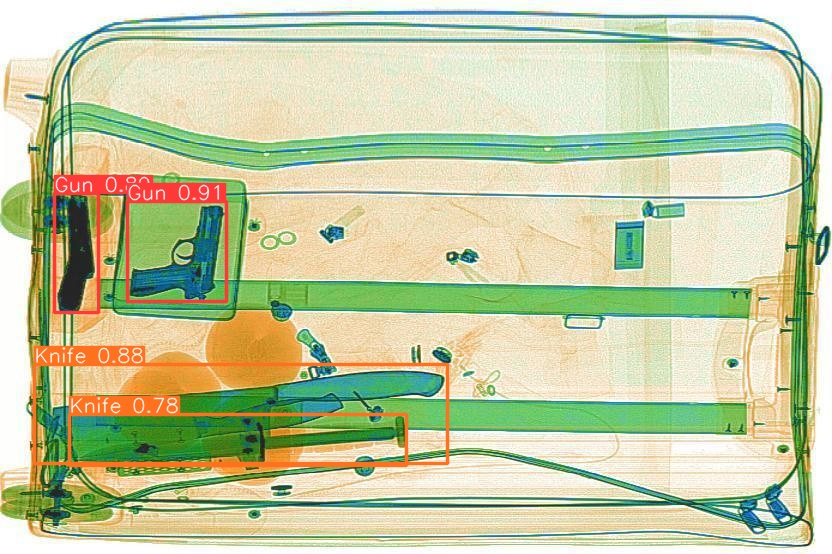

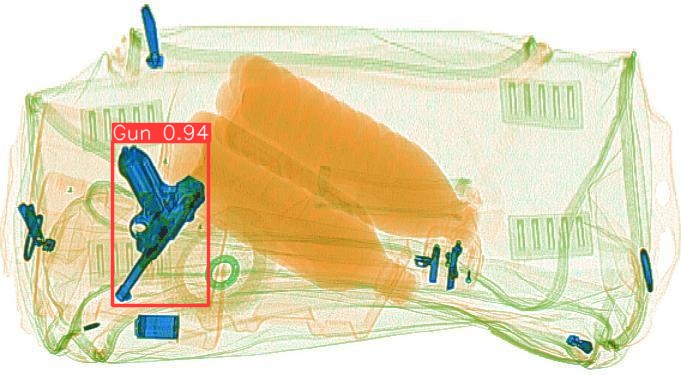

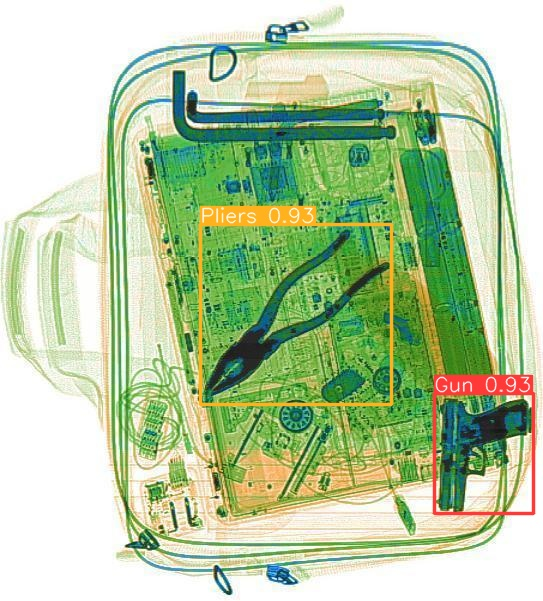

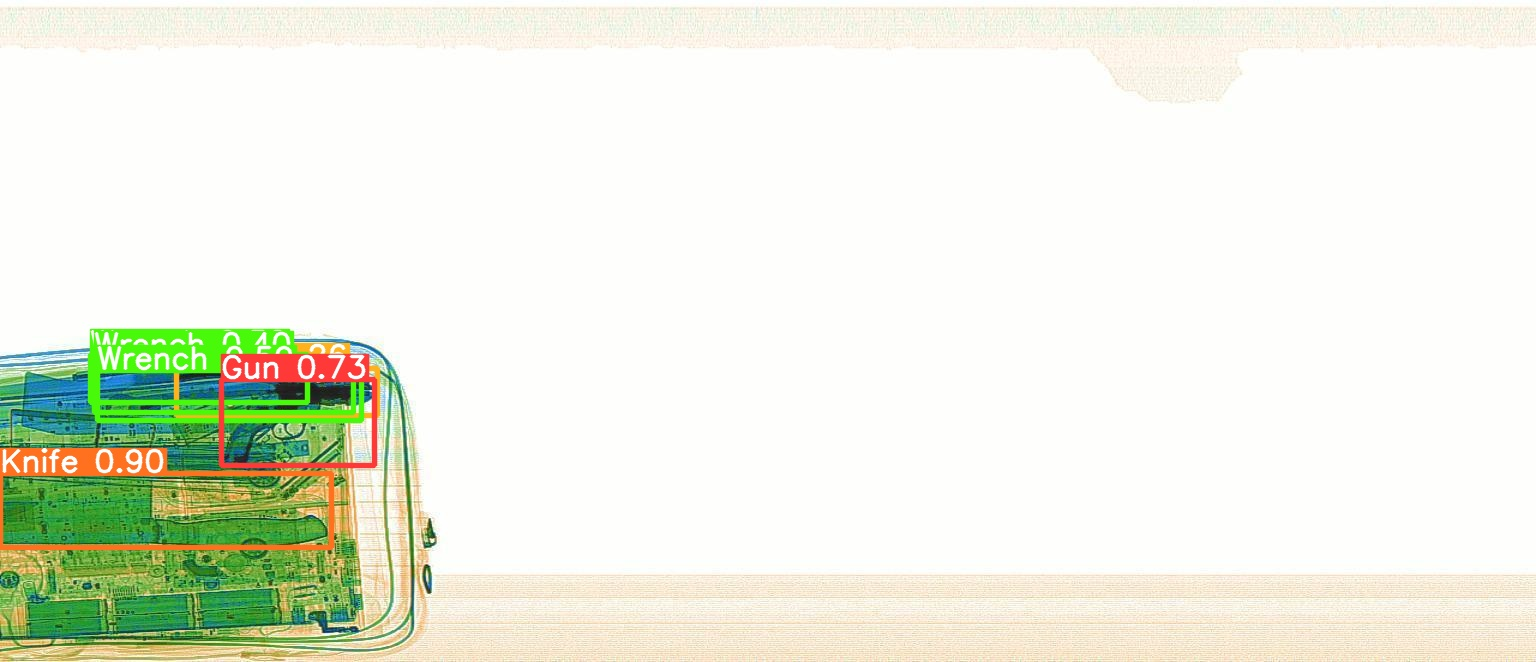

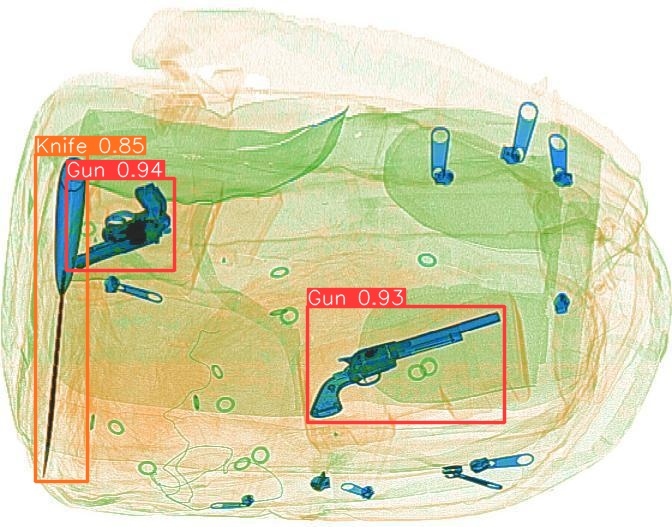

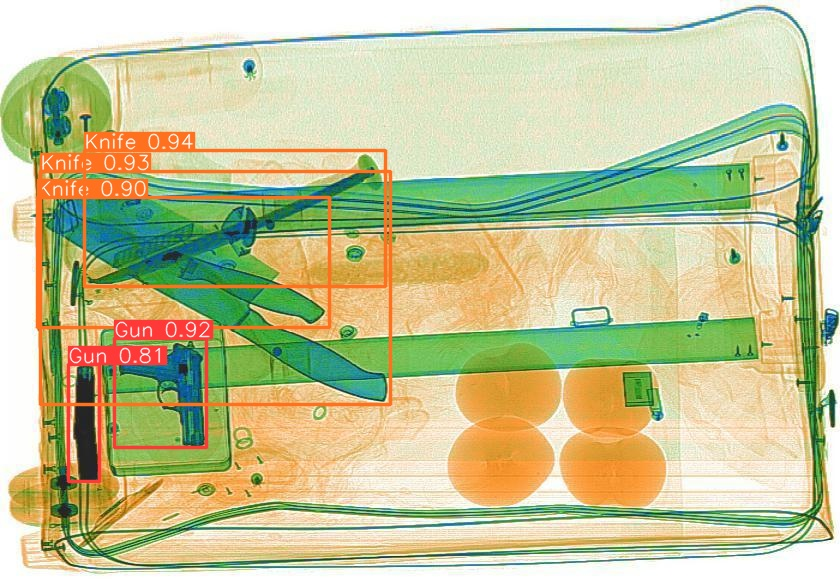

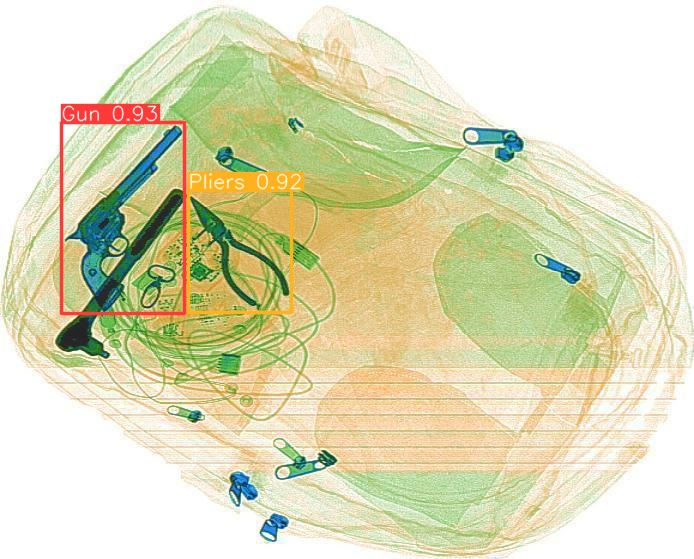

In [11]:
yolo8_model_detection=YOLO('YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-7/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)


image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 1 Pliers, 29.0ms
Speed: 2.6ms preprocess, 29.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 587/587 [00:16<00:00, 35.40it/s]

                   all        587       1503      0.932      0.897      0.921      0.778
Speed: 0.4ms preprocess, 22.1ms inference, 0.0ms loss, 2.0ms postprocess per image

PyTorch: starting from 'YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (49.6 MB)

TorchScript: starting export with torch 2.0.0...


TorchScript: export success ✅ 2.3s, saved as 'YOLO_weights/SIXray_Output/weights/best.torchscript' (99.1 MB)

Export complete (2.4s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640 data=/kaggle/working/datasets/sixray100-1/data.yaml  
Visualize:       https://netron.app
Loading YOLO_weights/SIXray_Output/weights/best.torchscript for TorchScript inference...

image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x640 1 Scissors, 37.0ms
Speed: 2.9ms preprocess, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Loading YOLO_weights/SIXray_Output/weights/best.torchscript for TorchScript inference...


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 587/587 [00:16<00:00, 36.05it/s]

                   all        587       1503      0.922      0.901      0.917      0.767
Speed: 0.4ms preprocess, 20.8ms inference, 0.0ms loss, 2.6ms postprocess per image



PyTorch: starting from 'YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (49.6 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 2.2s, saved as 'YOLO_weights/SIXray_Output/weights/best.onnx' (98.8 MB)

Export complete (2.3s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=YOLO_weights/SIXray_Output/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=YOLO_weights/SIXray_Output/weights/best.onnx imgsz=640 data=/kaggle/working/datasets/sixray100-1/data.yaml  
Visualize:       https://netron.app
Loading YOLO_weights/SIXray_Output/weights/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requ

val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 587/587 [00:17<00:00, 33.96it/s]

                   all        587       1503      0.922      0.901      0.917      0.767
Speed: 0.4ms preprocess, 24.6ms inference, 0.0ms loss, 1.2ms postprocess per image
ERROR ❌️ Benchmark failure for OpenVINO: inference not supported on GPU



PyTorch: starting from 'YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (49.6 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 2.2s, saved as 'YOLO_weights/SIXray_Output/weights/best.onnx' (98.8 MB)
requirements: Ultralytics requirement ['nvidia-tensorrt'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.9/340.9 MB 203.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata 